Выкачиваем датасет и сохраняем его в файле, если датасет скачан, можно пропустить этот шаг

In [31]:
import pandas as pd
df = pd.DataFrame([], columns=['name','gender', 'count', 'year'])
for year in range(1980, 2011):
    url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob{}.txt'.format(year)
    print(url)
    year_df = pd.read_csv(url, delimiter=',', names = ['name','gender', 'count'])
    year_df['year'] =  year
    df = df.append(year_df)
df.to_csv('usa_name_years.csv', encoding='utf-8')

https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1980.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1981.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1982.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1983.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1984.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1985.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1986.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1987.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1988.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1989.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-editi

подгрузка датасета из файла

In [25]:
import pandas as pd
import numpy as np
df = pd.read_csv('usa_name_years.csv',index_col=0, dtype={'count': np.int32, 'year': np.int32})
df.head(10)

,name,gender,count,year
0,Jennifer,F,58375,1980
1,Amanda,F,35817,1980
2,Jessica,F,33914,1980
3,Melissa,F,31625,1980
4,Sarah,F,25737,1980
5,Heather,F,19965,1980
6,Nicole,F,19910,1980
7,Amy,F,19832,1980
8,Elizabeth,F,19523,1980
9,Michelle,F,19113,1980


Сгруппируйте данные по полу и году и визуализация рождаемости

In [26]:
df.groupby(['year','gender']).agg({'name': 'count', 'count': 'sum'}).head()

name    count
year gender                
1980 F       12152  1659259
     M        7272  1782388
1981 F       12178  1666833
     M        7274  1789568
1982 F       12316  1692036

In [75]:
#grp = df.groupby(['year','gender']).agg({'count': 'sum'})
year_gender = pd.pivot_table(df, index=['year'], columns=['gender'], values=['count'], aggfunc='sum')

In [76]:
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
%matplotlib inline

In [77]:
year_gender.head(10)

count         
gender        F        M
year                    
1980    1659259  1782388
1981    1666833  1789568
1982    1692036  1812642
1983    1669486  1790670
1984    1682396  1802735
1985    1719450  1846162
1986    1714053  1839442
1987    1737508  1865113
1988    1779112  1911858
1989    1843057  1999840

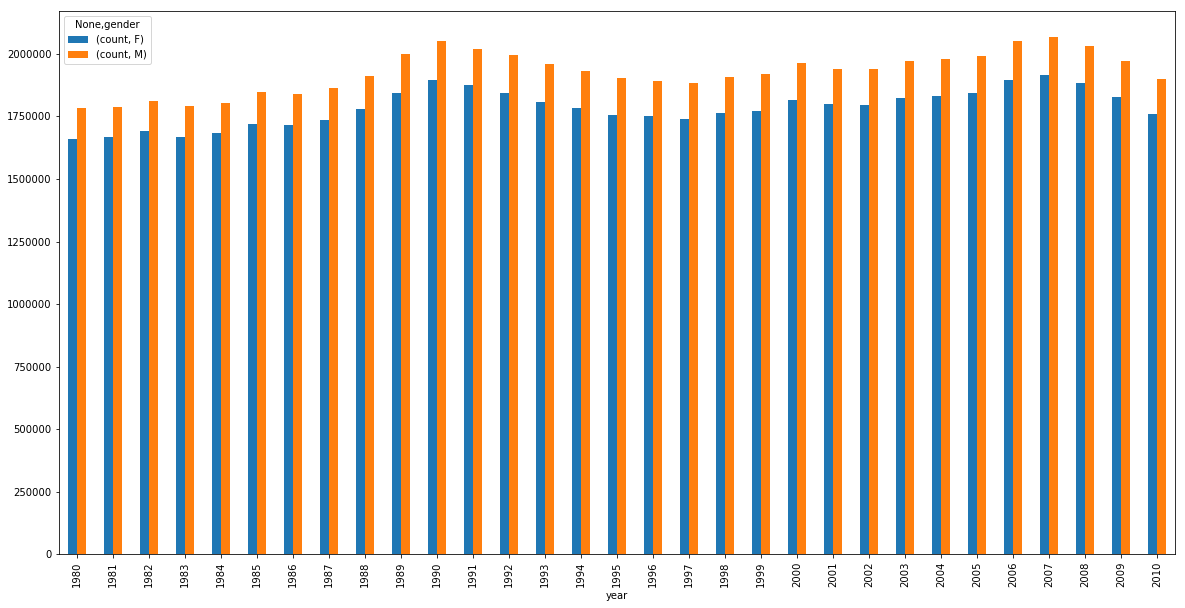

In [78]:
year_gender.plot.bar(figsize=(20,10), use_index=True, sharey=True, legend=True)

Самые популярные имена

In [31]:
df.groupby('name')['count'].agg({'count':'sum'}).sort_values('count', ascending=False).head(10)

,count
name,
Michael,1400614
Christopher,1136863
Matthew,1049049
Joshua,976137
Jessica,869007
Daniel,840313
David,833782
Ashley,800218
James,781217


сколько имен покрывают 50% людей за каждый код

In [52]:
#df.groupby(['year','name']).agg({'count':'sum'}).sort_values(by=[ 'count'] , ascending=[False])
#year_count = df.groupby('year')['count'].sum()
years = df.groupby(['year']).agg({'count':'sum'})
years.columns = ['total_count']
calc_df = years.join(df.set_index('year'))
calc_df['percent'] = calc_df['count']/(calc_df['total_count']/100)
sorted_df = calc_df.reset_index().sort_values(by=['year','percent'], ascending=[True, False])
sorted_df['total_percent'] = sorted_df['percent'].groupby(sorted_df['year']).transform(lambda x: x.expanding().sum())

In [57]:
limit_df = sorted_df[sorted_df['total_percent']>=50].groupby('year').agg({'total_percent':'min'})

In [67]:
limit_df.columns = ['limit_percent']

In [73]:
condition_df = limit_df.join(sorted_df.set_index('year'))
condition_df[condition_df['total_percent'] <= condition_df['limit_percent']].reset_index().groupby('year').agg({'name': 'count'})


,name
year,
1980,99
1981,97
1982,96
1983,91
1984,93
1985,95
1986,97
1987,100
1988,106


In [79]:
year_name = pd.pivot_table(df, index=['year'], columns=['name'], values=['count'], aggfunc='sum')

In [83]:
year_name.head(30)

count                                                                     \
name Aaban Aabid Aabriella Aadam Aadan Aadarsh   Aaden Aadesh Aadhav Aadhavan   
year                                                                            
1980   NaN   NaN       NaN   NaN   NaN     NaN     NaN    NaN    NaN      NaN   
1981   NaN   NaN       NaN   NaN   NaN     NaN     NaN    NaN    NaN      NaN   
1982   NaN   NaN       NaN   NaN   NaN     NaN     NaN    NaN    NaN      NaN   
1983   NaN   NaN       NaN   NaN   NaN     NaN     NaN    NaN    NaN      NaN   
1984   NaN   NaN       NaN   NaN   NaN     NaN     NaN    NaN    NaN      NaN   
1985   NaN   NaN       NaN   NaN   NaN     NaN     NaN    NaN    NaN      NaN   
1986   NaN   NaN       NaN   NaN   NaN     NaN     NaN    NaN    NaN      NaN   
1987   NaN   NaN       NaN   5.0   NaN     NaN     NaN    NaN    NaN      NaN   
1988   NaN   NaN       NaN   5.0   NaN     NaN     NaN    NaN    NaN      NaN   
1989   NaN   NaN       NaN   NaN   NaN     NaN     NaN    NaN    NaN      NaN   
1990   NaN   NaN       NaN   NaN   NaN     NaN     NaN    NaN    NaN      NaN   
1991   NaN   NaN       NaN   NaN   NaN     NaN     NaN    NaN    NaN      NaN   
1992   NaN   NaN       NaN   NaN   NaN     NaN     NaN    NaN    NaN      NaN   
1993   NaN   NaN       NaN   7.0   NaN     NaN     NaN    NaN    NaN      NaN   
1994   NaN   NaN       NaN   6.0   NaN     NaN     NaN    NaN    NaN      NaN   
1995   NaN   NaN       NaN   6.0   NaN     NaN     NaN    NaN    NaN      NaN   
1996   NaN   NaN       NaN   5.0   NaN     NaN     NaN    NaN    NaN      NaN   
1997   NaN   NaN       NaN   5.0   NaN     NaN     NaN    NaN    NaN      NaN   
1998   NaN   NaN       NaN   8.0   NaN     NaN     NaN    NaN    NaN      NaN   
1999   NaN   NaN       NaN   5.0   NaN     NaN     NaN    NaN    NaN      NaN   
2000   NaN   NaN       NaN   6.0   NaN     5.0     NaN    NaN    NaN      NaN   
2001   NaN   NaN       NaN   NaN   NaN     7.0     7.0    NaN    NaN      NaN   
2002   NaN   NaN       NaN  11.0   NaN    10.0    13.0    NaN    NaN      NaN   
2003   NaN   5.0       NaN  10.0   5.0    10.0    20.0    NaN    NaN      NaN   
2004   NaN   NaN       NaN   9.0   NaN    11.0    21.0    NaN    NaN      NaN   
2005   NaN   NaN       NaN   6.0   NaN    10.0    33.0    5.0    6.0      NaN   
2006   NaN   NaN       NaN   9.0   NaN    14.0    55.0    NaN    5.0      NaN   
2007   5.0   NaN       NaN   8.0   8.0    13.0   155.0    NaN    NaN      NaN   
2008   NaN   NaN       5.0   6.0  22.0    13.0   955.0    NaN    NaN      NaN   
2009   6.0   NaN       NaN   9.0  23.0    16.0  1270.0    5.0    5.0      NaN   

      ...                                                                 \
name  ...  Zyrus Zysean Zyshaun Zyshawn Zyshon Zyshonne Zytavious Zyvion   
year  ...                                                                  
1980  ...    NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1981  ...    NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1982  ...    NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1983  ...    NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1984  ...    NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1985  ...    NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1986  ...    NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1987  ...    NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1988  ...    NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1989  ...    NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1990  ...    NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1991  ...    NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1992  ...    NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1993  ...    NaN    NaN     NaN     NaN    NaN      NaN       NaN    NaN   
1994  ...    NaN    NaN     NaN     NaN

KeyboardInterrupt: 

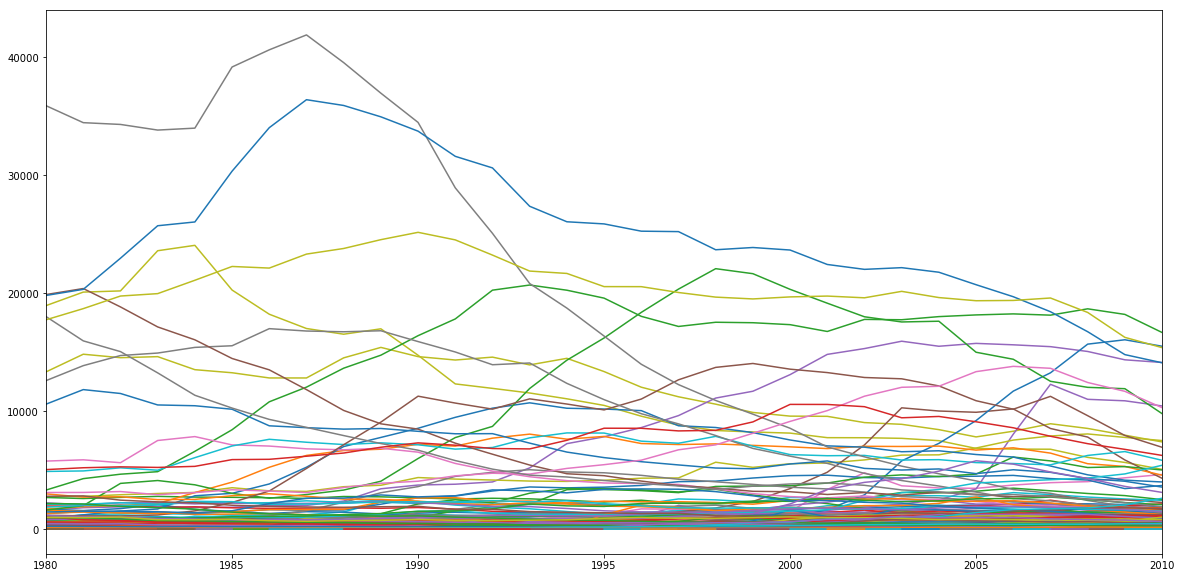

In [82]:
year_name.plot(figsize=(20,10), use_index=True, sharey=True)